In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [32]:
img1 = cv2.imread("panoramic.jpeg")
img2 = cv2.imread("1.jpg")

print(img1.shape, img2.shape)

(657, 877, 3) (2592, 1944, 3)


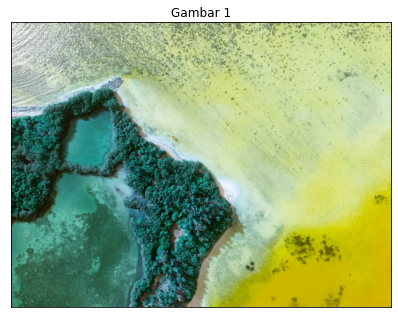

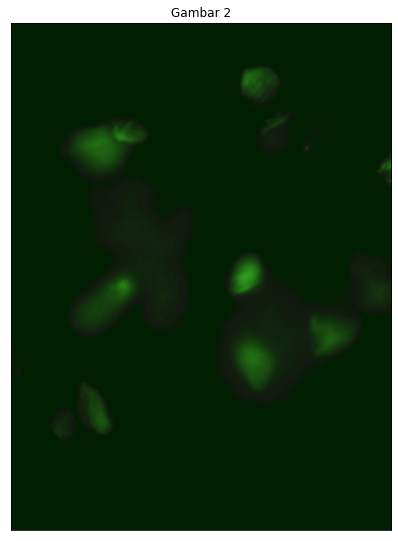

In [33]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(img1)
plt.title('Gambar 1'), plt.xticks([]), plt.yticks([])
plt.show()

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(img2)
plt.title('Gambar 2'), plt.xticks([]), plt.yticks([])
plt.show()

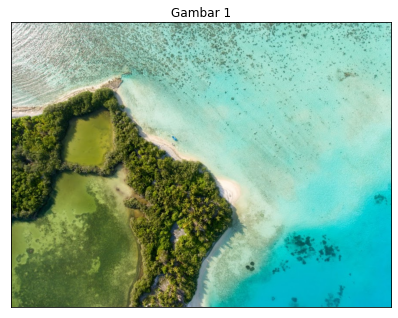

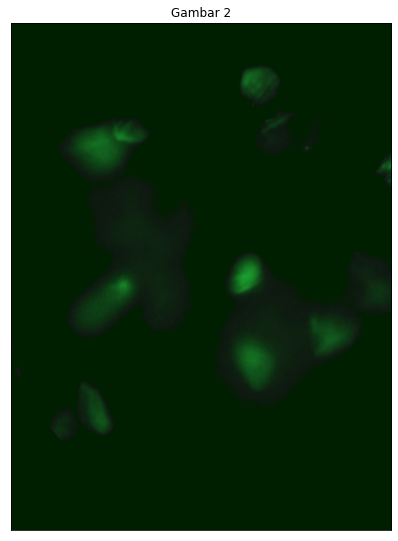

In [34]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(img1)
plt.title('Gambar 1'), plt.xticks([]), plt.yticks([])
plt.show()

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(img2)
plt.title('Gambar 2'), plt.xticks([]), plt.yticks([])
plt.show()

In [37]:
def vectorize_image(img):
    img_vectorized = img.reshape((-1,3))
    img_vectorized = np.float32(img_vectorized)
    
    return img_vectorized

img1_vectorized = vectorize_image(img1)
img2_vectorized = vectorize_image(img2)

print(img1_vectorized.shape, img2_vectorized.shape)

(576189, 3) (5038848, 3)


In [57]:
from sklearn.metrics import pairwise_distances_argmin
def kmeans(data, n_clusters):
    rand = np.random.RandomState(42)
    random_point = rand.permutation(data.shape[0])[:n_clusters]
    centroid = data[random_point]
    
    while True:
        label = pairwise_distances_argmin(data, centroid)
        
        new_centroid = np.array([data[label == i].mean(0) if data[label == i].size != 0 else [0,0,0] for i in range(n_clusters)])
        
        if np.all(centroid == new_centroid):
            break
        centroid = new_centroid
        
    return centroid, label

In [40]:
def convert_color(data, label, centroid):
    new_data = np.copy(data)
    for i in range(centroid.shape[0]):
        new_data[label == i] = centroid[i].astype(int)
    
    return new_data

In [49]:
def visualize(original_image, segmented_image, label, centroid):
    result_image = convert_color(segmented_image, label, centroid)
    result_image = np.uint8(result_image.reshape(original_image.shape))
    
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(result_image)
    plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])
    plt.show()

[[ 82.92487   98.847244  46.163998]
 [134.57137  205.40764  191.4517  ]]


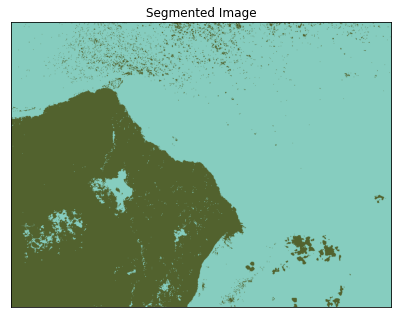

In [58]:
centroid12, label12 = kmeans(img1_vectorized, 2)
print(centroid12)
visualize(img1, img1_vectorized, label12, centroid12)

[[  7.7937727 183.52332   193.77606  ]
 [160.72208   209.81818   190.85115  ]
 [ 84.44128    98.75314    45.621513 ]]


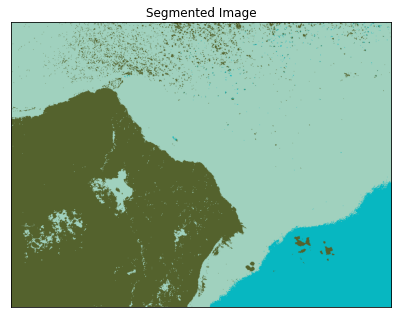

In [59]:
centroid13, label13 = kmeans(img1_vectorized, 3)
print(centroid13)
visualize(img1, img1_vectorized, label13, centroid13)

[[ 0.19088127 31.72987     0.22700985]
 [14.646801   42.048965   18.874533  ]]


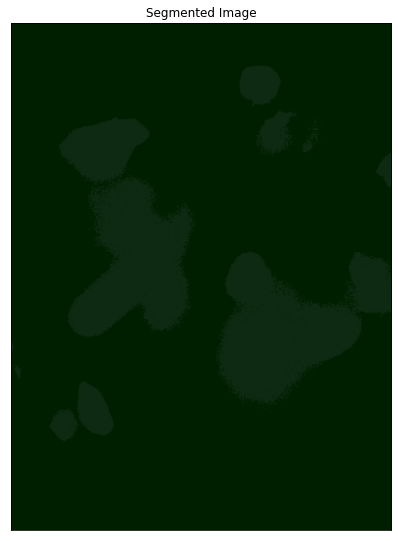

In [60]:
centroid22, label22 = kmeans(img2_vectorized, 2)
print(centroid22)
visualize(img2, img2_vectorized, label22, centroid22)

[[ 0.08469455 31.80015     0.10760241]
 [13.925275   32.514637   16.744963  ]
 [16.38957    78.37818    25.804483  ]]


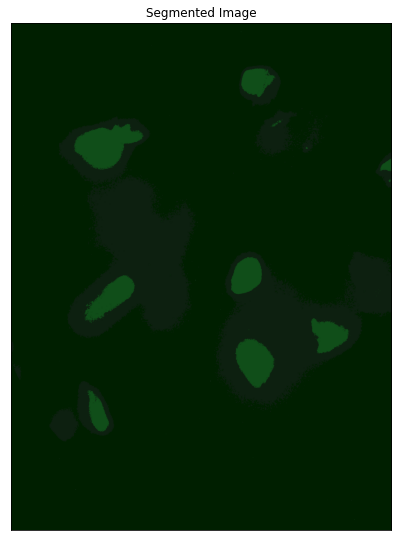

In [61]:
centroid23, label23 = kmeans(img2_vectorized, 3)
print(centroid23)
visualize(img2, img2_vectorized, label23, centroid23)

In [38]:
def calculate_sse(data, n_clusters, label, centroid):
    error = 0
    for i in range(n_clusters):
        error += np.sum(np.square(data[label == i] - centroid[i]))
        
    return error

In [64]:
def elbow_method(data):
    wcss = []
    for i in range(1, 11):
        cent, lab = kmeans(data, i)
        err = calculate_sse(data, i, lab, cent)
        wcss.append(err)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

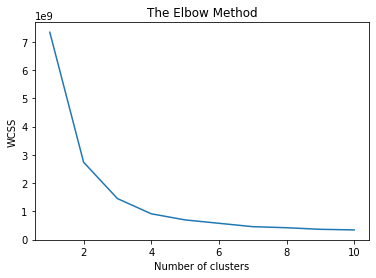

In [65]:
elbow_method(img1_vectorized)

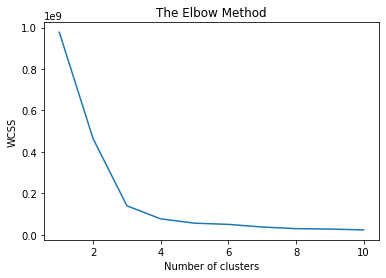

In [66]:
elbow_method(img2_vectorized)